### ☕ Coffee Quality database from CQI ☕

- Fernanda Defalco
- Guilherme César de Lima Nascimento
- Youlia Kamei Saito

These data contain reviews of 1312 arabica and 28 robusta coffee beans from the Coffee Quality Institute's trained reviewers.
https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi


<!-- 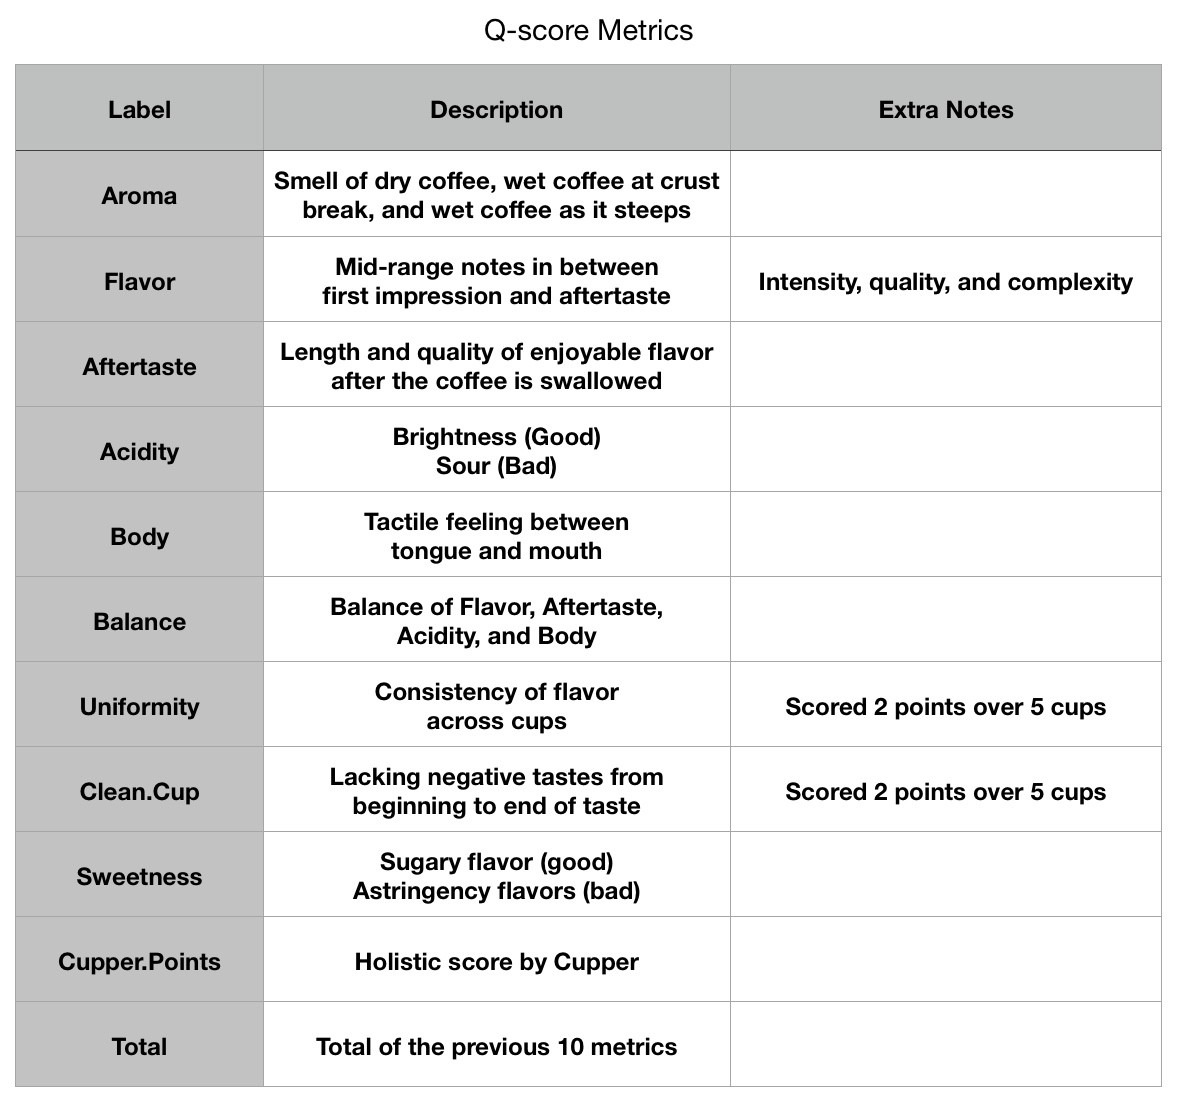 -->
<img src="tabela_parametros.jpeg" alt="Drawing" style="width: 600px;"/>


_______
Importando bibliotecas
_____

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from matplotlib.ticker import PercentFormatter

_______
Definindo funções a serem utilizadas
_____

In [48]:
def outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR
    df_new = dataframe.loc[(dataframe[column] >= lower_boundary) & (dataframe[column] <= upper_boundary)]
    return df_new

_______
Importando o dataset
___

In [49]:
df_coffee = pd.read_csv('merged_data_cleaned.csv')
df_coffee.shape

(1339, 44)

In [50]:
df_coffee.head(3)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0


In [51]:
df_coffee.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [52]:
# Fazendo o drop de algumas colunas que não trazem informações relevantes para a nossa análise
cols = [0,2,4,5,6,7,11,37,38,39]

df_coffee.drop(df_coffee.columns[cols], axis = 1, inplace = True)

In [53]:
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               1339 non-null   object 
 1   Country.of.Origin     1338 non-null   object 
 2   Company               1130 non-null   object 
 3   Altitude              1113 non-null   object 
 4   Region                1280 non-null   object 
 5   Number.of.Bags        1339 non-null   int64  
 6   Bag.Weight            1339 non-null   object 
 7   In.Country.Partner    1339 non-null   object 
 8   Harvest.Year          1292 non-null   object 
 9   Grading.Date          1339 non-null   object 
 10  Owner.1               1332 non-null   object 
 11  Variety               1113 non-null   object 
 12  Processing.Method     1169 non-null   object 
 13  Aroma                 1339 non-null   float64
 14  Flavor                1339 non-null   float64
 15  Aftertaste           

In [54]:
#Transformando as regiões NaN em 'Desconhecida'
df_coffee['Region'][df_coffee['Region'].isna()] = 'Desconhecida'

In [55]:
#Dropando a linha em que o país era NaN e a linha em que as medidas de qualidade estavam nulas
df_coffee[df_coffee['Country.of.Origin'].isna()]
df_coffee.drop([1197, 1310], inplace = True)

In [56]:
df_coffee.describe().round(3)
#Percebe-se que há altitudes bem elevadas no máximo das colunas altitude_low_meters, altitude_high_meters e altitude_mean_meters	 

,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1337.000,1336.000,1337.000,1108.000,1108.000,1108.000
mean,154.096,7.573,7.527,7.407,7.542,7.523,7.524,9.842,9.842,9.864,7.509,82.154,0.088,0.480,0.174,3.558,1751.030,1799.708,1775.369
std,130.042,0.315,0.341,0.349,0.319,0.308,0.354,0.485,0.716,0.554,0.427,2.687,0.048,2.552,0.833,5.316,8673.349,8672.712,8672.533
min,0.000,5.080,6.080,6.170,5.250,5.080,5.250,6.000,0.000,1.330,5.170,59.830,0.000,0.000,0.000,0.000,1.000,1.000,1.000
25%,14.000,7.420,7.330,7.250,7.330,7.330,7.330,10.000,10.000,10.000,7.250,81.170,0.090,0.000,0.000,0.000,1100.000,1100.000,1100.000
50%,175.000,7.580,7.580,7.420,7.580,7.500,7.500,10.000,10.000,10.000,7.500,82.500,0.110,0.000,0.000,2.000,1310.640,1350.000,1310.640
75%,275.000,7.750,7.750,7.580,7.750,7.670,7.750,10.000,10.000,10.000,7.750,83.670,0.120,0.000,0.000,4.000,1600.000,1650.000,1600.000
max,1062.000,8.750,8.830,8.670,8.750,8.580,8.750,10.000,10.000,10.000,10.000,90.580,0.280,63.000,11.000,55.000,190164.000,190164.000,190164.000


____
Identificando Outliers
____

In [57]:
df_measures = df_coffee[['Aroma','Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity','Clean.Cup', 'Sweetness']]

In [58]:
box_3 = px.box(pd.melt(df_measures), x="variable", y="value", color="variable")
box_3.update_layout(
    xaxis_title=None,
    yaxis_title="Nota",
    legend_title_text='Parâmetros',
    title={
    'text': 'Identificação de outliers em cada parâmetro',
    'y':0.93,
    'x':0.5,
    'font_color': 'black'}
)
box_3.show()

Pelos boxplots acima é possível notar a presença de outliers em todos os parâmetros, contudo, esses valores estão entre os valores permitidos entre 0 e 10. Assim, mesmo que eles fujam da normalidade, não podem ser considerados erros que devem ser excluídos.

____
Corrigindo altitudes
____

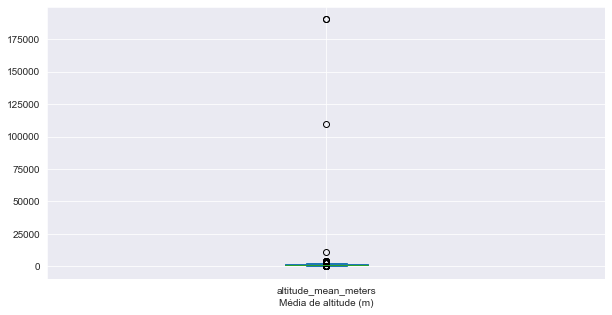

In [59]:
#Checando outliers da altitude
box_1 = df_coffee.plot(y='altitude_mean_meters', kind='box', figsize=(10, 5));
box_1.set_xlabel('Média de altitude (m)');

In [60]:
#Identificando países que tem altitudes muito elevadas
#Chega-se à conclusão que Brasil, Guatemala e Nicaragua tem altitudes que são bem elevadas e foram inseridas errado.
df_coffee.iloc[:,[1,31,32,33]].groupby('Country.of.Origin').max().round(2)

,altitude_low_meters,altitude_high_meters,altitude_mean_meters
Country.of.Origin,,,
Brazil,11000.00,11000.00,11000.00
Burundi,1880.00,1880.00,1880.00
China,1850.00,1850.00,1850.00
Colombia,2560.00,5900.00,3850.00
Costa Rica,1900.00,1900.00,1900.00
Cote d?Ivoire,200.00,200.00,200.00
Ecuador,800.00,800.00,800.00
El Salvador,1500.00,1500.00,1500.00
Ethiopia,2000.00,2200.00,2075.00


In [61]:
display(df_coffee.loc[(df_coffee["Country.of.Origin"] == "Brazil") & (df_coffee["altitude_high_meters"] >= 2000)].iloc[:,[1,31,32,33]])
cols = ["altitude_low_meters","altitude_high_meters","altitude_mean_meters"]

for coluna in cols:
    df_coffee[coluna].loc[df_coffee[coluna] == 11000] = 1100


,Country.of.Origin,altitude_low_meters,altitude_high_meters,altitude_mean_meters
543,Brazil,11000.0,11000.0,11000.0


In [62]:
df_coffee.loc[(df_coffee["Country.of.Origin"] == "Nicaragua") & (df_coffee["altitude_high_meters"] >= 1000)].iloc[:,[1,31,32,33]]

for coluna in cols:
    df_coffee[coluna].loc[df_coffee[coluna] == 110000] = 1100

In [63]:
df_coffee.loc[(df_coffee["Country.of.Origin"] == "Guatemala") & (df_coffee["altitude_high_meters"] >= 2000)].iloc[:,[1,31,32,33]]

,Country.of.Origin,altitude_low_meters,altitude_high_meters,altitude_mean_meters
215,Guatemala,3280.0,3280.0,3280.0
419,Guatemala,2100.0,2100.0,2100.0
837,Guatemala,3280.0,3280.0,3280.0
896,Guatemala,190164.0,190164.0,190164.0
1001,Guatemala,3280.0,3280.0,3280.0
1144,Guatemala,190164.0,190164.0,190164.0


In [64]:
cols = ["altitude_low_meters","altitude_high_meters","altitude_mean_meters"]

for coluna in cols:
    df_coffee[coluna][(df_coffee[coluna] == 190164)] = df_coffee[coluna][df_coffee['Country.of.Origin'] == 'Guatemala'].mean()

In [65]:
#Identificando países com baixas altitudes
df_coffee.iloc[:,[1,31,32,33]].groupby('Country.of.Origin').min().round(2)

,altitude_low_meters,altitude_high_meters,altitude_mean_meters
Country.of.Origin,,,
Brazil,1.00,1.00,1.00
Burundi,1700.00,1700.00,1700.00
China,1100.00,1100.00,1100.00
Colombia,165.00,165.00,165.00
Costa Rica,13.00,13.00,13.00
Cote d?Ivoire,200.00,200.00,200.00
Ecuador,40.00,40.00,40.00
El Salvador,1200.00,1200.00,1200.00
Ethiopia,1097.28,1550.00,1493.52


In [66]:
df_coffee.loc[(df_coffee["Country.of.Origin"] == "Brazil") & (df_coffee["altitude_high_meters"] < 100)].iloc[:,[1,4,31,32,33]]

,Country.of.Origin,Region,altitude_low_meters,altitude_high_meters,altitude_mean_meters
41,Brazil,sul de minas - carmo de minas,12.0,12.0,12.0
42,Brazil,sul de minas - carmo de minas,12.0,12.0,12.0
279,Brazil,south of minas,1.0,1.0,1.0
481,Brazil,south of minas,1.0,1.0,1.0
613,Brazil,south of minas,1.0,1.0,1.0
683,Brazil,south of minas,1.0,1.0,1.0
737,Brazil,south of minas,1.0,1.0,1.0
761,Brazil,south of minas,1.0,1.0,1.0
780,Brazil,south of minas,1.0,1.0,1.0
838,Brazil,south of minas,1.0,1.0,1.0


In [67]:
cols = ["altitude_low_meters","altitude_high_meters","altitude_mean_meters"]

for coluna in cols:
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Brazil") & (df_coffee["Region"] == "sul de minas - carmo de minas")] =  1200
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Brazil") & (df_coffee["Region"] == "south of minas")] =  1000
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Brazil") & (df_coffee["Region"] == "sul de minas")] =  1250


In [68]:
df_coffee.loc[(df_coffee["Country.of.Origin"] == "Kenya")].iloc[:,[1,4,31,32,33]]
for coluna in cols:
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Kenya") & (df_coffee[coluna] < 600)] = df_coffee[coluna][df_coffee['Country.of.Origin'] == 'Kenya'].mean()

In [69]:
for coluna in cols:
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Guatemala") & (df_coffee["Region"] == "el progreso")] =  1370
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Guatemala") & (df_coffee["Region"] == "oriente")] =  1370


In [70]:
for coluna in cols:
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Mexico") & (df_coffee["altitude_low_meters"] == 100)] =  1000
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Mexico") & (df_coffee["Region"] == "amatenango de la frontera")] =  1600


In [71]:
for coluna in cols:
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Costa Rica") & (df_coffee["Region"] == "turrialba")] =  1300
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Costa Rica") & (df_coffee["altitude_low_meters"] == 185) & (df_coffee["Region"] == "tarrazu")] =  1850

____
Substituindo valores Nan nas altitudes
___

In [ ]:
df_coffee[(df_coffee['altitude_low_meters'].isna())]

In [73]:
# Valores vazios foram substituídos pela média do país
paises = df_coffee['Country.of.Origin'].unique()
cols = ["altitude_low_meters","altitude_high_meters","altitude_mean_meters"]

for pais in paises:
        for coluna in cols:
                df_coffee[coluna][(df_coffee[coluna].isna()) & (df_coffee['Country.of.Origin'] == pais)] = df_coffee[coluna][(df_coffee['Country.of.Origin'] == pais)].mean()


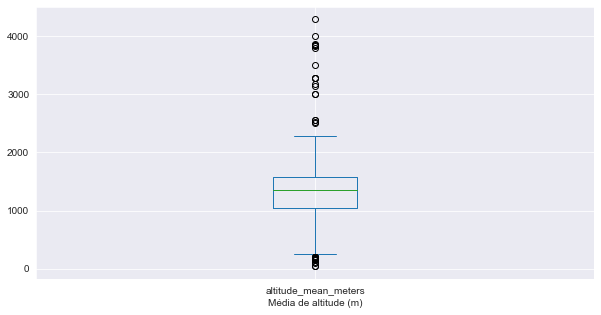

In [74]:
#Checando outliers da altitude após correções
box_2 = df_coffee.plot(y='altitude_mean_meters', kind='box', figsize=(10, 5));
box_2.set_xlabel('Média de altitude (m)');


_____

### Análises
___

1. Análise da relação entre a altitude e os parâmetros de qualidade do café

Gráfico de dispersão para análise de correlação entre altitude e qualidade

In [75]:
#Removendo outliers da altitude
df_altitude = outliers(df_coffee, 'Total.Cup.Points')

                      Total.Cup.Points  altitude_mean_meters
Total.Cup.Points              1.000000              0.162761
altitude_mean_meters          0.162761              1.000000


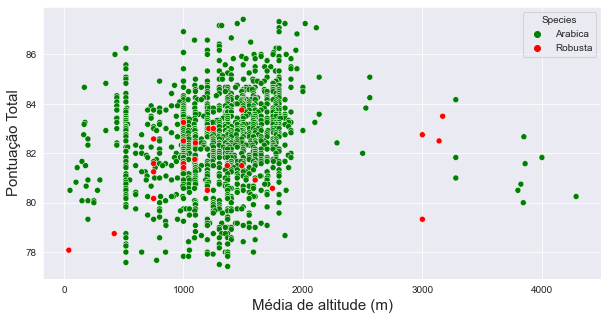

In [76]:
plt.figure(figsize = (10,5))
disp_1 = sns.scatterplot(data = df_altitude, y = 'Total.Cup.Points', x = 'altitude_mean_meters', hue=df_altitude['Species'], palette=['Green', 'Red']);
disp_1.set_ylabel('Pontuação Total', fontsize = 15)
disp_1.set_xlabel('Média de altitude (m)', fontsize = 15)

print(df_altitude[['Total.Cup.Points', 'altitude_mean_meters']].corr())

In [77]:
df_measures = df_coffee[['Aroma','Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity','Clean.Cup', 'Sweetness']]

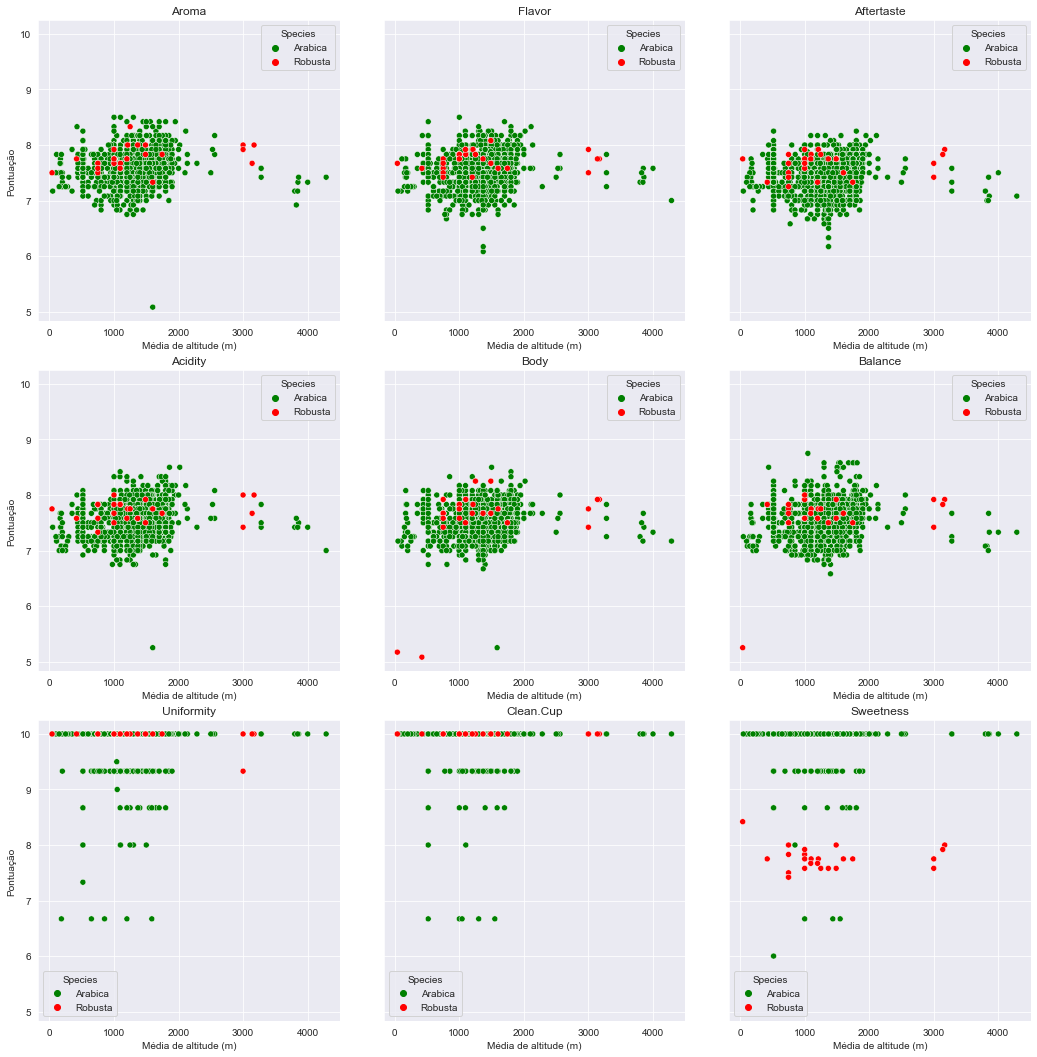

In [78]:
fig, ax = plt.subplots(3, 3, figsize=(15,15), sharey=True)
fig.tight_layout(pad=3)

y  = 0
for coluna in df_measures.columns:
    i, j = divmod(y, 3)
    sns.scatterplot(data = df_altitude, x = 'altitude_mean_meters', y = coluna, hue=df_altitude['Species'], ax=ax[i,j], palette=['Green', 'Red']);
    ax[i,j].set(title=coluna, xlabel= 'Média de altitude (m)', ylabel='Pontuação')
    y += 1


In [79]:
lista = [np.corrcoef(df_altitude[coluna], df_altitude['altitude_mean_meters'])[0,1] for coluna in df_measures.columns] 
corr_alt_parametros = pd.DataFrame(lista, df_measures.columns)
corr_alt_parametros.rename(columns = {0: 'Correlação'}, inplace=True)
corr_alt_parametros

,Correlação
Aroma,0.123596
Flavor,0.099381
Aftertaste,0.071402
Acidity,0.148322
Body,0.099763
Balance,0.109568
Uniformity,0.129315
Clean.Cup,0.100108
Sweetness,0.031686


- Pelos gráficos e pela tabela acima confirmamos que há uma baixa correlação entre a altitude média e qualquer um dos parâmetros de qualidade avaliados.

Pesquisando em sites especializados e artigos vimos que maiores altitudes são associadas com mais doçura, com sabores de café mais complexos. A causa real de um café ser delicioso e de melhor qualidade é a temperatura.

Poderiam ser inseridas no banco de dados as temperaturas dos locais e latitude para que pudéssemos avaliar a influência do clima na qualidade do café.

A qualidade do café é algo complexo. Ela é afetada por muitos fatores: a espécie e a variedade do café, os métodos de cultivo e de processamento, a qualidade do solo, o clima local e como ele varia a cada ano, as condições de armazenamento e de exportação, a torra, o preparo…

Em temperaturas mais baixas, o pé de café cresce mais devagar e os grãos vão amadurecer mais gradualmente. Isto significa que têm mais tempo para desenvolver os sabores complexos do café.

Por outro lado, há desvantagens: esses mesmos pés de café podem produzir menos frutos, requerem mais cuidado, e a colheita ocorre mais tarde no ano. O café não deveria ser cultivado em um clima muito quente, e nem tão pouco cultivado em um muito frio. Temperatura ideal: 17-23⁰C, embora possa ser cultivado com menos eficácia entre 14-30⁰C.

Fonte: https://perfectdailygrind.com/pt/2020/06/01/cafe-de-altitude-o-quanto-ela-afeta-a-qualidade/


2. Análise da correlação entre as medidas de qualidade

Gráfico heatmap

In [80]:
display(df_measures.head())

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness
0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0
1,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0
2,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0
3,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0
4,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0


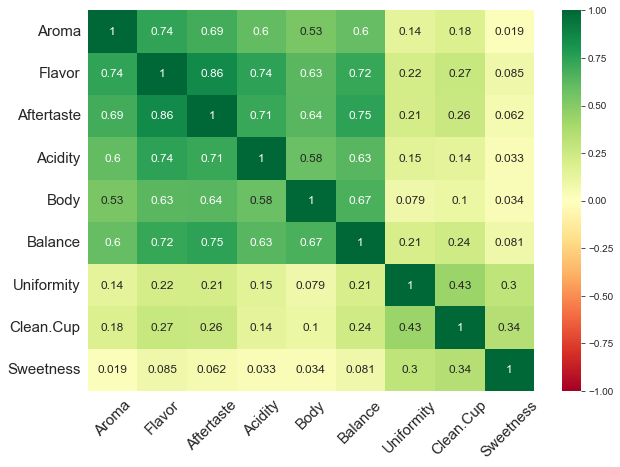

In [81]:
plt.figure(figsize=(10,7))

heat_1 = sns.heatmap(df_measures.corr(), cmap='RdYlGn', vmin=-1, vmax=1, annot = True, annot_kws={'size':12});
heat_1.set_xticklabels(heat_1.get_xmajorticklabels(), fontsize = 15);
heat_1.set_yticklabels(heat_1.get_ymajorticklabels(), fontsize = 15);
heat_1.tick_params(axis='x', rotation=45)

Nota-se pelo gráfico de heatmap que as medidas com maiores correlações são a o sabor e o gosto residual, balanço e sabor residual, sabor e acidez, sabor e aroma e balanço e sabor; já as medidas com menor correlação são aroma e doçura, acidez e doçura e corpo e doçura. No geral, as medidas uniformidade, clean cup e doçura não estão correlacionadas as outras medidas como aroma, sabor, sabor residual, acidez, corpo e balanço. 
No geral, as medidas com maiores valores de correção eram esperadas, assim como a uniformidade não ser tão correlacionada. Porém, comparando com outros estudos, o parâmetro doçura deveria ser mais correlacionado com parâmetros como sabor e aroma.

Fonte: https://towardsdatascience.com/analyzing-sweet-marias-coffee-cupping-metrics-3be460884bb1

In [82]:
add = []
for coluna in df_measures.columns:
    g = pd.cut(df_measures[coluna], bins=[0,5,6,7,8,9,11], labels = ['0-5','5.01-6','6.01-7','7.01-8','8.01-9','9.01-10'])
    df = df_measures.groupby(g, observed=True)[coluna].agg(['count']).reset_index()
    df['Parametro'] = coluna
    df.rename(columns = {coluna:'Nota'}, inplace = True)
    add.append(df)

df_conc = pd.concat(add)

df_new = df_conc.pivot_table(index = df_conc["Nota"], columns = df_conc["Parametro"]).apply(lambda x: x/x.sum()).applymap(lambda x: "{0:.1f}%".format(100*x))
df_new = df_new.replace(['nan%'],'-')
df_new

count                                                              \
Parametro Acidity Aftertaste  Aroma Balance   Body Clean.Cup Flavor Sweetness   
Nota                                                                            
0-5             -          -      -       -      -      0.2%      -      0.1%   
5.01-6       0.1%          -   0.1%    0.1%   0.2%      0.7%      -      0.2%   
6.01-7       5.0%      14.1%   4.5%    8.8%   4.5%      1.0%   7.7%      0.6%   
7.01-8      89.8%      83.6%  90.1%   85.8%  91.7%      1.2%  87.7%      2.5%   
8.01-9       5.2%       2.2%   5.4%    5.3%   3.6%      1.2%   4.6%      1.0%   
9.01-10         -          -      -       -      -     95.7%      -     95.6%   

                      
Parametro Uniformity  
Nota                  
0-5                -  
5.01-6          0.2%  
6.01-7          0.5%  
7.01-8          2.0%  
8.01-9          2.4%  
9.01-10        94.8%

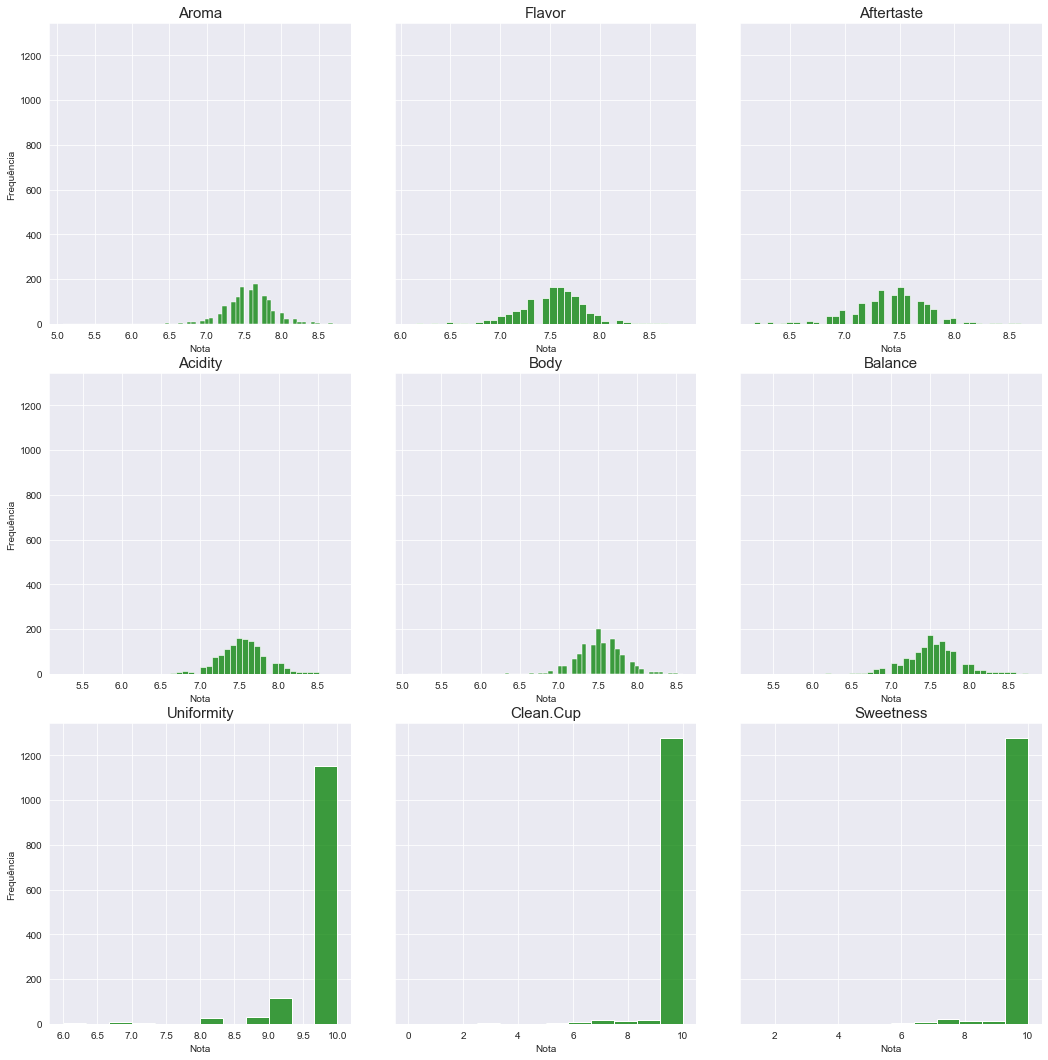

In [83]:
fig, ax = plt.subplots(3, 3, figsize=(15,15), sharey=True)
fig.tight_layout(pad=3)

y  = 0
for coluna in df_measures.columns:
    i, j = divmod(y, 3)
    sns.histplot(data = df_coffee , x = coluna, ax=ax[i,j], color='Green');
    ax[i,j].set(xlabel= 'Nota', ylabel='Frequência')
    ax[i,j].set_title(coluna, fontsize = 15)
    y += 1

Dos histogramas apresentados, observa-se que os parâmetros Uniformity, Clean.Cup e Sweetness apresentaram uma grande frequencia de nota máxima. Isso ocorre porque essas pontuações estão diretamente relacionadas a defeitos e não são uma classificação do sabor inerente de um café, como muitas pessoas supõem. Só devem tirar pontos deles se um dos copos tiver uma mancha ou defeito completo.

A doçura (Sweetness) é a mais branda, pois ocasionalmente uma xícara contaminada ainda exibe alguma doçura e não precisa ser mais penalizada. Um café só deve ter uma dedução de doçura se a xícara for realmente desprovida de toda doçura.

Este conjunto de dados vem de "Avaliadores Q" (Q de Qualidade) qualificados que usam essas categorias como pretendido. Isso mostra o quanto o sistema Q (Q Grader System) valoriza o café sem defeitos, pois as penalidades por defeitos se multiplicam rapidamente. Um defeito completo pode prejudicar uma pontuação em 10 pontos.

3. Análise da pontuação com os países de origem

In [92]:
hist_1 = px.histogram(df_coffee, 'Country.of.Origin')
hist_1.update_xaxes(tickangle=45, categoryorder = 'total ascending')
hist_1.update_layout(
    xaxis_title=None,
    yaxis_title="Contagem de lotes",
    showlegend=False,
    title={
    'text': 'Quantidade de diferentes lotes de café por país',
    'y':0.93,
    'x':0.5,
    'font_color': 'black'}
    )
hist_1.update_traces(marker=dict(color='Green'))
hist_1.show()

In [85]:
df_ranking = df_coffee.groupby(by = 'Country.of.Origin').agg({'Total.Cup.Points':'mean'}).sort_values(by = 'Total.Cup.Points')

hist_2 = px.bar(df_ranking,width=900, height=500)
hist_2.update_xaxes(tickangle=45)
hist_2.update_layout(
    xaxis_title=None,
    yaxis_title="Pontuação Total",
    showlegend=False,
    title={
    'text': 'Média da pontuação total por país',
    'y':0.93,
    'x':0.5,
    'font_color': 'black'}
    )
hist_2.update_traces(marker=dict(color='Green'))
hist_2.show()

- Top 5 países com maiores médias 
- Papua New Guinea
- Ethiopia
- Japan
- United States
- Kenya

A lista dos países com as maiores médias apresenta algumas diferenças comparadas ao senso comum. Como a presença dos Estados Unidos na lista que provavelmente refere-se à produção do Hawaii (conhecida pelo café Kona) e pelo Japão que normalmente é retratado como grande imporador de café e não produtor.

In [86]:
df_ranking = df_coffee.groupby(by = 'Country.of.Origin').agg({'Total.Cup.Points':'max'}).sort_values(by = 'Total.Cup.Points')

hist_3 = px.bar(df_ranking,width=900, height=500)
hist_3.update_xaxes(tickangle=45)
hist_3.update_layout(
    xaxis_title=None,
    yaxis_title="Pontuação Total",
    showlegend=False,
    title={
    'text': 'Máxima pontuação total por país',
    'y':0.93,
    'x':0.5,
    'font_color': 'black'}
    )
hist_3.update_traces(marker=dict(color='Green'))
hist_3.show()

- Países com maiores pontuações 
- Ethiopia
- Guatemala
- Brazil
- Peru
- United States

A lista dos países com as maiores pontuações está condizente com o senso comum. Contudo, a presença dos Estados Unidos na lista provavelmente deve-se à produção do Hawaii, onde as encostas da ilha de Kona são ideais para o cultivo de café, com um microclima excepcional, a combinação perfeita de chuva e calor e terras ricas e vulcânicas.

4. Diferenças das 2 espécies

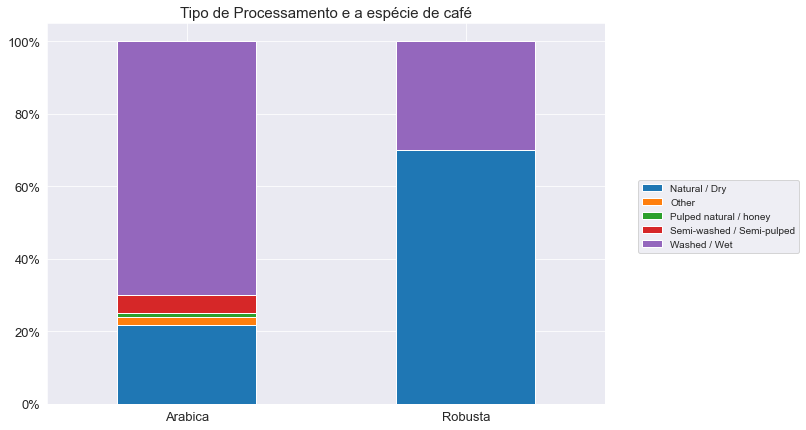

In [87]:
stck_1 = df_coffee.groupby('Species')['Processing.Method'].value_counts(normalize=True).unstack('Processing.Method').plot.bar(stacked=True, figsize=(10,7));
stck_1.legend(bbox_to_anchor = (1.05,0.6));
plt.title('Tipo de Processamento e a espécie de café', fontsize=15);
plt.xticks(fontsize=13,  rotation='horizontal');  
plt.yticks(fontsize=13);
plt.xlabel(None);
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]);

Enquanto que no arábica o método de processamento mais utilizado é o Washed/Wet (aproximadamente 70%), no Robusta o mais utilizado é o método Natural/Dry (aproximadamente 70% também). O café Robusta apresenta somente dois métodos de processamento: o Natural/Dry e o Washed/Wet; já o Arábica, além destes dois métodos, apresenta em menor proporção os métodos Pulped natural/honey, Semi-wahed/Semi-pulped e outros.   

A maior parte do café arábica do mundo é processada pelo método Washed/Wet; é por isso que o café arábica puro tem um sabor azedo distinto, uma vez que é na etapa de fermentação deste método que as melhores qualidades dos grãos de café têm a oportunidade de se destacar. O processamento por este método apresenta um sabor de café uniforme, higiênico, café azedo característico, excelente qualidade do grão de café.

O método de processamento Natural/Dry é o mais antigo e fácil, adequado para áreas com recursos hídricos limitados. Esse método é comumente usado no Brasil, Etiópia e Vietnã com a linha de produtos Café Robusta. Neste tipo de processamento a qualidade dos grãos de café é heterogênea devido a muitos fatores como clima, nível de luz do sol, longo tempo de secagem.


● O Arábica úmido: aromas frutados e florais, ligados ao sabor da acidez. 
● O Arábica Natural: notas frutadas são mais suaves em comparação com o tipo anterior, e o aroma na xícara é denso e persistente com notas de mel e especiarias.
● Arábica semi-lavado: o café fica uniforme na torra e encorpado e doce na xícara.
● Robusta lavado: é suave e adequada para misturas de café expresso.
● Robusta natural: tem grande corpo, mas há diferentes nuances no sabor da bebida de acordo com suas origens.

Fonte: http://asiacom.vn/the-current-popular-coffee-processing-method/
https://laboratorioespresso.it/en/arabica-and-robusta-coffees/


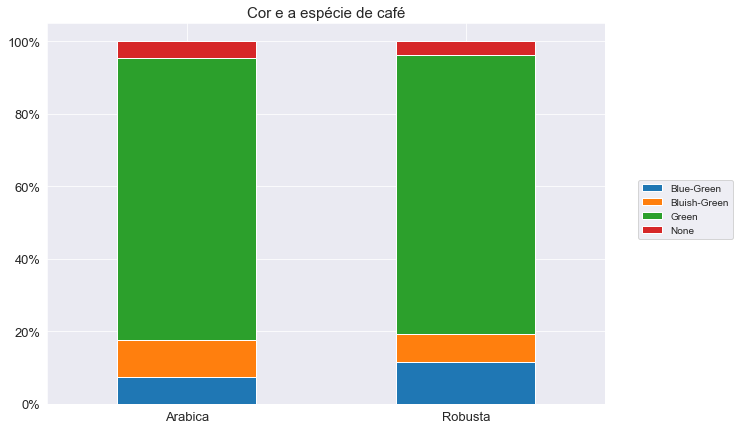

In [88]:
stck_2 = df_coffee.groupby('Species')['Color'].value_counts(normalize=True).unstack('Color').plot.bar(stacked=True, figsize=(10,7));
stck_2.legend(bbox_to_anchor = (1.05,0.6));
plt.title('Cor e a espécie de café', fontsize=15);
plt.xticks(fontsize=13,  rotation='horizontal');  
plt.yticks(fontsize=13);
plt.xlabel(None);
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]);

As duas espécies apresentaram resultados próximos, tendo mais de 70% na cor verde, porém a espécie Arábica apresentou um pouco mais de Bluish-Green em relação ao Robusta e um pouco menos da variação Blue-Green. Os cafés nas tonalidade Green, Blue-Green e Bluish-Green são considerados especiais, sendo que os grãos das cores Blue-Green e Bluish-Green normalmente apresentam uma qualidade ligeiramente superior ao Green e por isso são considerados os mais desejáveis(CHERIAN,2022; Specialty Coffee Association of America, 2004).

Fonte: https://rpubs.com/acherian/856961
http://www.scaa.org/?page=resources&d=green-coffee-protocols&source=post_page---------------------------

In [89]:
#Analisando os parâmetros que diferenciam as duas espécies
df_parametros_especies = df_coffee.groupby(['Species']).mean().round(2)
df_parametros_especies.iloc[:,1:12]


,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points
Species,,,,,,,,,,,
Arabica,7.57,7.52,7.40,7.54,7.52,7.52,9.84,9.84,9.91,7.50,82.18
Robusta,7.70,7.63,7.56,7.66,7.51,7.54,9.90,9.93,7.68,7.76,80.87


Nota-se que o parâmetro que mais diferencia as duas espécies é o Sweetness

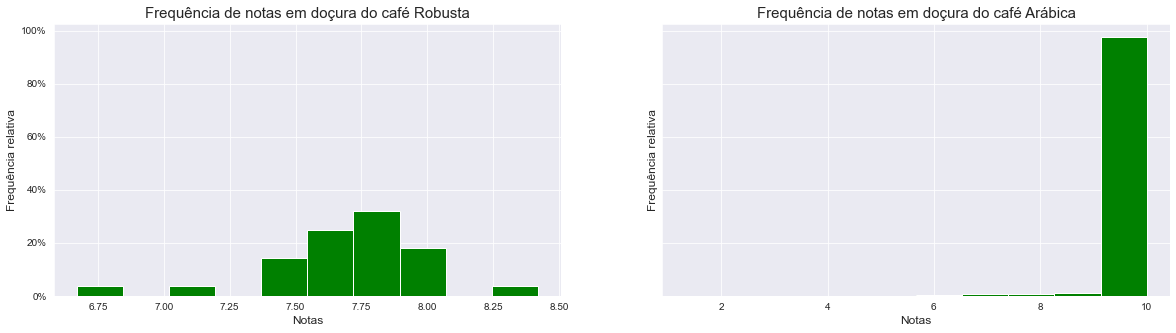

In [90]:

df_arabica = df_coffee.loc[df_coffee['Species'] == 'Arabica']
df_robusta = df_coffee.loc[df_coffee['Species'] == 'Robusta']

fig, hist_4 = plt.subplots(1, 2, figsize=(20,5), sharey=True)

hist_4[0].hist(df_robusta['Sweetness'], weights=np.ones(len(df_robusta['Sweetness'])) / len(df_robusta['Sweetness']),color='Green')
hist_4[0].set_title('Frequência de notas em doçura do café Robusta', fontsize = 15)
hist_4[0].set_ylabel('Frequência relativa', fontsize=12)
hist_4[0].set_xlabel('Notas', fontsize=12)
hist_4[1].hist(df_arabica['Sweetness'], weights=np.ones(len(df_arabica['Sweetness'])) / len(df_arabica['Sweetness']),color='Green')
hist_4[1].set_title('Frequência de notas em doçura do café Arábica', fontsize = 15)
hist_4[1].set_ylabel('Frequência relativa',fontsize=12)
hist_4[1].set_xlabel('Notas', fontsize=12)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

A espécie Arábica, por exemplo, tem quase o dobro de sacarose que a Robusta – uma das razões pelas quais ganhou fama de ser de melhor qualidade. A doçura varia também dentro dos tipos de café Arábica, como por exemplo o Bourbon ser mais doce que o Catimor.